In [1]:
%matplotlib inline
import networkx as nx


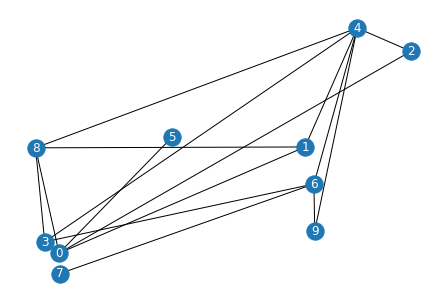

In [2]:
G = nx.erdos_renyi_graph(10, p=0.3)
nx.draw_random(G, with_labels=True, font_color='w')

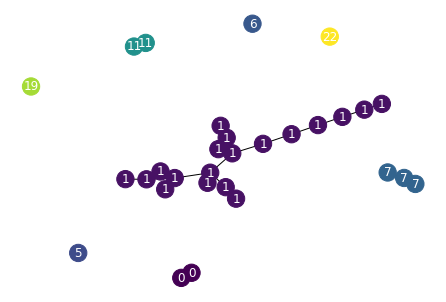

In [100]:
def DFS(G):
    visited = [False for _ in G.nodes()]
    ctr = 0
    # Explore starting from a root
    def Explore(n):
        if visited[n]:
            #print("Already visited", n)
            return
        
        # Visit the node (customize your DFS here)
        #print('visiting:', n)
        visited[n] = True
        cclabel[n] = ctr
        
        for neighbor in G.adj[n]:
            Explore(neighbor)

    for n in G:
        Explore(n)
        ctr += 1

G = nx.erdos_renyi_graph(30, 0.05)
cclabel = [None for _ in G.nodes()]
DFS(G)
# nx.draw(G, with_labels=True, font_color='w')
nx.draw(G, with_labels=True, font_color='w', node_color=cclabel, labels=dict(zip(G.nodes(),cclabel)))

In [65]:
# from collections import deque as Stack (some differences)
class Stack():
    def __init__(self): self.s = []
    def push(self, a): self.s.append(a)
    def pop(self): return self.s.pop()
    def __len__(self): return len(self.s)
    def __repr__(self): return repr(self.s)


def DFS_iter(G):
    visited = [False for _ in G.nodes()]
    # "♫ DFS is exploring with a stack ♫"
    toVisit = Stack()

    for n in G.nodes:
        # Each node gets added to the stack if not visited
        if not visited[n]: toVisit.push(n)

        while len(toVisit):
            n = toVisit.pop()
            
            # Skip a node if it's already visited
            if visited[n]: continue
                
            # Otherwise visit it and mark as visited
            print('visiting:', n)
            
            visited[n] = True
            
            # Put all the neighbors on the stack
            for neighbor in list(G.adj[n]):
                toVisit.push(neighbor)
        
DFS_iter(G)

visiting: 0
visiting: 8
visiting: 7
visiting: 5
visiting: 2
visiting: 6
visiting: 1
visiting: 4
visiting: 9
visiting: 3


visiting: 0
visiting: 6
visiting: 7
visiting: 9
visiting: 3
visiting: 8
visiting: 2
visiting: 5
visiting: 1
visiting: 4


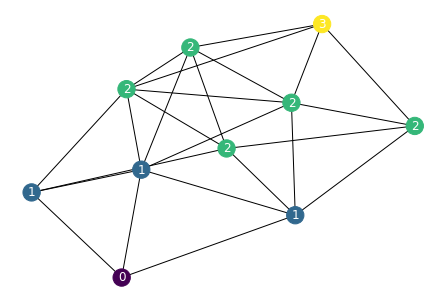

In [106]:
# from collections import deque as Stack (some differences)
class Queue():
    def __init__(self): self.s = []
    def push(self, a): self.s.insert(0,a)
    def pop(self): return self.s.pop()
    def __len__(self): return len(self.s)
    def __repr__(self): return repr(self.s)


def BFS_iter(G):
    visited = [False for _ in G.nodes()]
    # "♫ BFS is exploring with a queue ♫"
    toVisit = Queue()
    

    for n in G.nodes:
        # Each node gets added to the stack if not visited
        if not visited[n]: toVisit.push(n)
        if not cclabel[n]: cclabel[n] = 0 # Distance from n in con(n)

        while len(toVisit):
            n = toVisit.pop()
            
            # Skip a node if it's already visited
            if visited[n]: continue
                
            # Otherwise visit it and mark as visited
            print('visiting:', n)
            
            visited[n] = True
            
            # Put all the neighbors on the stack
            for neighbor in list(G.adj[n]):
                if cclabel[neighbor] is None: 
                    cclabel[neighbor] = cclabel[n]+1 # Distance from n in con(n)
                toVisit.push(neighbor)
        
cclabel = [None for _ in G.nodes()]
G = nx.erdos_renyi_graph(10, 0.5)
BFS_iter(G)
nx.draw(G, with_labels=True, font_color='w', node_color=cclabel, labels=dict(zip(G.nodes(),cclabel)))